<a href="https://colab.research.google.com/github/SonTung2k5/SonTung2k5/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math

In [16]:
from google.colab import files
uploaded = files.upload()
data = pd.read_excel("ex2data1.xlsx")


Saving ex2data1.xlsx to ex2data1 (1).xlsx


In [17]:
arr = np.array(data)
arr

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [95.86155507, 38.22527806,  0.        ],
       [75.01365839, 30.60326323,  0.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [39.53833914, 76.03681085,  0.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ],
       [67.94685548, 46.67857411,  0.        ],
       [70.66150955, 92.92713789,  1.        ],
       [76.97878373, 47.57596365,  1.        ],
       [67.37202755, 42.83843832,  0.   

In [18]:
X_vals = data.iloc[:,:-1].values  # Features
y_vals = data.iloc[:,-1].values   # Target

In [19]:
X_vals

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [20]:
y_vals

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

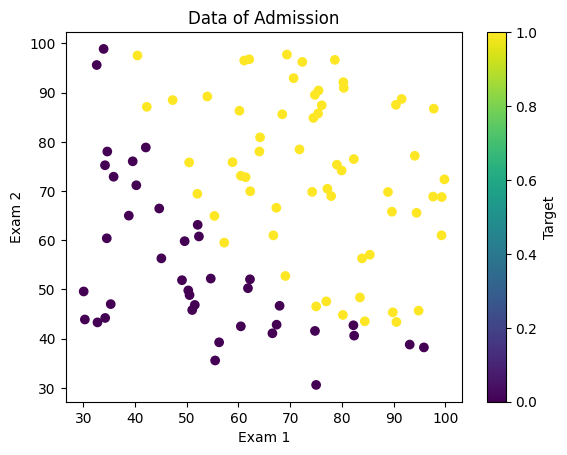

In [21]:
# @title

plt.scatter(data['mark1'], data['mark2'], c=data['admission'], cmap='viridis')

# Add titles and labels
plt.title('Data of Admission')
plt.xlabel('Exam 1')  # X-axis label
plt.ylabel('Exam 2')  # Y-axis label

# Add a color bar to show the target values
plt.colorbar(label='Target')

# Show the plot
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_vals, y_vals, test_size=0.25, random_state=0
)

In [23]:
def sigmoid(x):
  return 1/(1+ np.exp(-x))

In [24]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
    X (ndarray): Shape (m, n) matrix of examples with n features
    y (ndarray): Shape (m,) target values
    w (ndarray): Shape (n,) parameters for prediction
    b (scalar): parameter for prediction

    Returns:
    cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)

    cost = (1 / m) * cost
    return cost


In [25]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
    X : (ndarray Shape (m,n)) variable such as house size
    y : (ndarray Shape (m,)) actual value
    w : (ndarray Shape (n,)) parameters of the model
    b : (scalar) parameter of the model

    Returns:
    dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w
    dj_db: (scalar) The gradient of the cost w.r.t. the parameter b
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i, j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw


In [26]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent.

    Args:
    X (ndarray): Shape (m, n), matrix of examples
    y (ndarray): Shape (m,), target values
    w_in (ndarray): Shape (n,), initial values of parameters of the model
    b_in (scalar): Initial value of parameter of the model
    alpha (float): Learning rate
    num_iters (int): Number of iterations to run gradient descent

    Returns:
    w (ndarray): Shape (n,), updated values of parameters
    b (scalar): Updated value of parameter

    """
    # Number of training examples
    m = len(X)

    J_history = []
    # Initialize weights and bias
    w = copy.deepcopy(w_in)  # Avoid modifying global w
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)  # Compute gradients

        # Update parameters using the gradients and learning rate
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save the cost at each iteration
        if i < 100000:  # Prevent excessive memory usage
            J_history.append(compute_cost_logistic(X, y, w, b))

        # Print cost at intervals (10 times or fewer during training)
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history,  # Return final weights, bias, and cost history


In [27]:

w_in = np.zeros_like(X_train[0])
b_in = 0
alpha = 0.1
num_iters = 10000
w_out, b_out, _ = gradient_descent(X_train, y_train, w_in, b_in, alpha, num_iters)
print (f"\nupdated parameters: w:{w_out}, b:{b_out}")

<ipython-input-24-4d476d4b3a9a>:19: RuntimeWarning: divide by zero encountered in log
  cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
<ipython-input-24-4d476d4b3a9a>:19: RuntimeWarning: invalid value encountered in scalar multiply
  cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)


Iteration    0: Cost nan   
Iteration 1000: Cost 5.473180169211162   
Iteration 2000: Cost 92.06360657106462   
Iteration 3000: Cost nan   
Iteration 4000: Cost nan   
Iteration 5000: Cost nan   
Iteration 6000: Cost nan   
Iteration 7000: Cost nan   
Iteration 8000: Cost nan   
Iteration 9000: Cost nan   

updated parameters: w:[2.23813236 1.62306113], b:-73.24640457879619


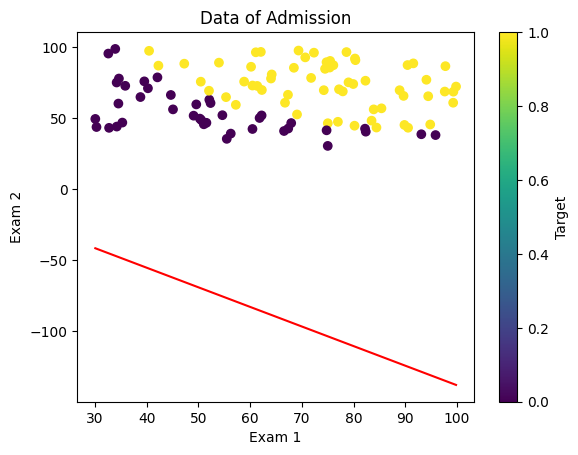

In [28]:
# @title
w1, w2 = w_out[0], w_out[1]
b = b_in
plt.scatter(data['mark1'], data['mark2'], c=data['admission'], cmap='viridis')

# Add titles and labels
plt.title('Data of Admission')
plt.xlabel('Exam 1')  # X-axis label
plt.ylabel('Exam 2')  # Y-axis label
x1_vals = np.linspace(data['mark1'].min(), data['mark1'].max(), 100)

# Calculate x2 for the decision boundary
x2_vals = -(w1 / w2) * x1_vals - (b / w2)

# Plot the decision boundary
plt.plot(x1_vals, x2_vals, color='red', label='Decision Boundary')
# Add a color bar to show the target values
plt.colorbar(label='Target')

# Show the plot
plt.show()
